In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
#from decimal import *
from scipy import integrate

In [2]:
def Integrate(func,x0,y0,x,h):
    # Finds value of y for a given x using step size h 
    # and initial value y0 at x0.
    def RK4(func,x0,y0,h):
        K0 = h*func(x0,y0)
        K1 = h*func(x0 + 0.5*h, y0 + 0.5*K0)
        K2 = h*func(x0 + 0.5*h, y0 + 0.5*K1)
        K3 = h*func(x0 + h, y0 + K2)
        return (K0 + 2.*K1 + 2.*K2 + K3)/6.
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
         # Count number of iterations using step size or
        h = min(h,x - x0)# step height h
        y0 = y0 + RK4(func,x0,y0,h)#update next value of y
        x0 = x0 + h#update next value of x
        X.append(x0)
        Y.append(y0)
    return np.array(X),np.array(Y)

In [7]:
def shooting(func,u,x0,x,xf,step,k=1.0,h=0.01):
    def res(u):# Boundary condition residual
        X,Y = Integrate(func,x0,IC(u,k),x,h)
        y = Y[len(Y) - 1]#last value of Y
        r = np.zeros(len(u))
        r[0] = y[0]#y0(inf)=0
        r[1] = y[2]/x + y[3]#y_3(inf)/r + y_4(inf)=0
        return r
    x_list = []
    root_list = []
    while x<=xf:
        #print("x=",x)
        x_list.append(x)
        #print("u=",u)
        root = optimize.root(res,u)
        #print("root=",root)
        u = root.x
        #print("u=",u)
        root_temp = optimize.root(res,root.x)
        #print("root_temp=",root_temp)
        root_list.append(root_temp.x)
        X,Y = Integrate(func,x0,IC(root_temp.x,k),x,h)
        x = x+step
    return X,Y,root_temp,np.array(x_list),np.array(root_list)

In [4]:
def IC(u,k=1.):#Initial conditions array, the first correspond to the initial condition in phi
    return np.array([k,0.0,u[0],0.0,u[1]])

In [5]:
def f0(x,y):
    l = 0.
    F = np.zeros(5)
    if x==0:
        F[0] = y[1]
        F[1] = 2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = 0.
        F[4] = 0.
    else:
        F[0] = y[1]
        F[1] = -2.*(l+1.)*y[1]/x +2.*y[0]*(y[2]-y[4])
        F[2] = y[3]
        F[3] = (2.*l+1.)*x**(2.*l)*y[0]**2. - 2.*y[3]/x
        F[4] = 0.
    return F

In [6]:
##l=0
u1_0 = 0.63173215# 1st trial value of unknown init. cond.
u2_0 = 1.28125868# 2nd trial value of unknown init. cond.
u_0 = np.array([u1_0, u2_0])
x0_0 = 2.#first integration

In [8]:
x0_1v1 = 0.0# Start of integration
xf_1v1 = 10. # End of integration
step_0 = 0.5

In [12]:
X1v1_f,Y1_fv1,root1_fv1,arr_x1v1,arr_list1v1=shooting(f0,u_0,x0_1v1,x0_0,xf_1v1,step_0)

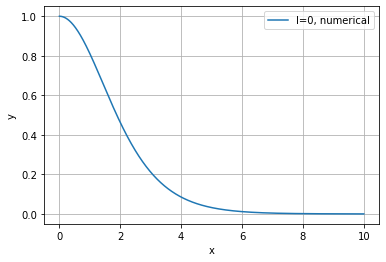

In [13]:
plt.plot(X1v1_f,Y1_fv1[:,0],label='l=0, numerical')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right', prop={'size':10})

# SFDM density profile

$$\begin{equation}
\rho(r) = \begin{cases}
\frac{\rho_{sol}}{\left[ 1 + (r/r_{sol})^{2} \right]^{8}} & r<r_{\epsilon}\\
\frac{\rho_{NFW}}{\left( 1+r/r_{s} \right)^{2}\frac{r}{r_{s}}} & r\geq r_{\epsilon}
\end{cases}
\end{equation}$$

In [22]:
#constants
rho_soliton = 2.42e9#SM*kpc−3
m_axion = 1.0e-22#eV
G = 4.302e-6#kpc/SM(km/s)^2
h_bar = 6.582e-16#eV*s

In [14]:
def rho_minor(r,rho_sol,m_a):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    d = (1. + (r/rsol)**2.)**8.
    return 1/d

In [15]:
def rho_mayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*(r_eps/r_s**3.)*(r_s + r_eps)**2.
    d = (r/r_s**3.)*(r_s + r)**2.
    return delta_NFW/d

$$\begin{equation}
r_{sol} = \left[ \frac{\rho_{\text{sol}}}{2.42\times 10^{9}\text{M}_{\odot}\text{kpc}^{-3}}\left(\frac{m_{a}}{10^{-22}eV}\right)^{2} \right]^{-0.25}\text{kpc}
\end{equation}$$

In [23]:
#Las fracciones de rho_soliton son sacadas de los ajustes del paper de Alma, r_sol y r_eps están definidos en ese paper
rsol_1 = ((rho_soliton*0.037/2.42e9)*(m_axion/1.0e-22)**2.)**(-0.25)
r_eps_1 = rsol_1*np.sqrt(0.48**(-1./8.) - 1.)
rsol_2 = ((rho_soliton*0.057/2.42e9)*(m_axion/1.0e-22)**2.)**(-0.25)
r_eps_2 = rsol_2*np.sqrt(0.464**(-1./8.) - 1.)
print(r_eps_1)

0.7067744650135565


In [24]:
#Arrays de casi sero al radio del corte r_eps y de r_eps al radio mayor que queremos ej.15
r_1 = np.linspace(0.1,r_eps_1,30)
r_2 = np.linspace(r_eps_1,15.,80)

Text(0.5, 0, 'r')

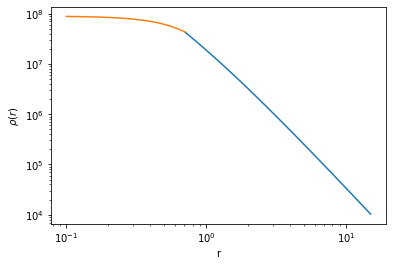

In [25]:
plt.plot(r_2,rho_soliton*0.037*rho_mayor(r_2,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39))
plt.plot(r_1,rho_soliton*0.037*rho_minor(r_1,rho_sol=0.037*rho_soliton,m_a=m_axion))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rho(r)$')
plt.xlabel('r')

In [26]:
def rho_tot(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            d = (1. + (r[i]/rsol)**2.)**8.
            result.append(rho_sol/d)
        else:
            delta_NFW = eps*(r_eps/r_s**3.)*(r_s + r_eps)**2.
            d = (r[i]/r_s**3.)*(r_s + r[i])**2.
            result.append(delta_NFW*rho_sol/d)
    return np.array(result)

In [27]:
r = np.linspace(0.1,100,100)

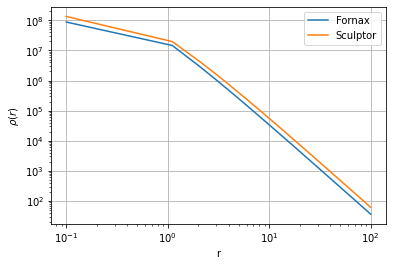

In [28]:
plt.plot(r,rho_tot(r,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39),label='Fornax')
plt.plot(r,rho_tot(r,rho_sol=0.057*rho_soliton,m_a=m_axion,eps=0.464,r_s=0.57),label='Sculptor')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\rho(r)$')
plt.xlabel('r')
plt.legend(loc='upper right', prop={'size':10})
plt.grid(True)

# Unidades para la parte numérica

In [29]:
R = np.linspace(0,10,81)

In [30]:
#G tiene unidades de kpc/SM *(km/s)^2, aqui estamos convirtiendo esos km a kpc, ya que 1km = 3.24x10^17kpc
G_kpc=G*(3.24e-17)**2.
print(G_kpc)

4.51606752e-39


In [58]:
#Este tiene mal las unidades
eps = (4.*np.pi*G*h_bar**2.*rho_soliton/m_axion**2.)**(0.25)
print(eps)

48792.47496841681


In [102]:
print(rho_soliton)

2420000000.0


In [59]:
#Este tiene bien las unidades
ep = (4.*np.pi*G_kpc*rho_soliton*h_bar**2./(m_axion**2.))**(0.25)
print(ep)

0.0002777316364385088


In [60]:
phi_0=m_axion**2.*Y1_fv1[:,0]**2*ep**4./(h_bar**2.*4.*np.pi*G_kpc)

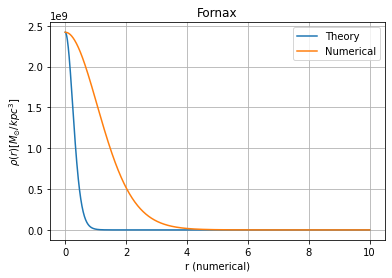

In [81]:
#la rho_soliton que estoy tomando también la debería de multiplicar por la fracción para fornax? ie.rho_sol=0.037*rho_soliton
#plt.plot(r_1,rho_soliton*0.037*rho_minor(r_1,rho_sol=0.037*rho_soliton,m_a=m_axion),label='Theory')
plt.plot(X1v1_f,rho_soliton*rho_minor(X1v1_f,rho_sol=rho_soliton,m_a=m_axion),label='Theory')
plt.plot(X1v1_f,phi_0,label='Numerical')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'$\rho(r)[M_{\odot}/kpc^{3}]$')
plt.xlabel('r (numerical)')
plt.grid(True)
plt.title('Fornax')
plt.legend(loc='upper right', prop={'size':10})

In [95]:
# c de km a kpc
3.0e5*3.24e-17

9.72e-12

In [96]:
r_units = X1v1_f*h_bar*(3.0e5)/(m_axion*ep)#km
r_units_kpc = X1v1_f*h_bar*(9.72e-12)/(m_axion*ep)#kpc

In [93]:
print(ep)

0.0002777316364385088


In [97]:
h_bar*(9.72e-12)/(m_axion)#kpc

6.397703999999999e-05

In [98]:
h_bar*(3.0e5)/(m_axion)#km

1974600000000.0

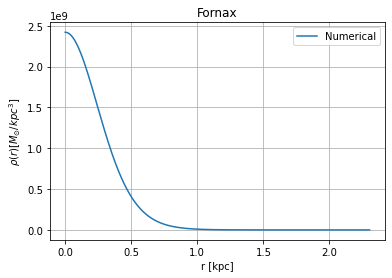

In [101]:
#plt.plot(r_units_kpc,rho_soliton*rho_minor(X1v1_f,rho_sol=rho_soliton,m_a=m_axion),label='Theory')
plt.plot(r_units_kpc,phi_0,label='Numerical')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'$\rho(r)[M_{\odot}/kpc^{3}]$')
plt.xlabel('r [kpc]')
plt.grid(True)
plt.title('Fornax')
plt.legend(loc='upper right', prop={'size':10})

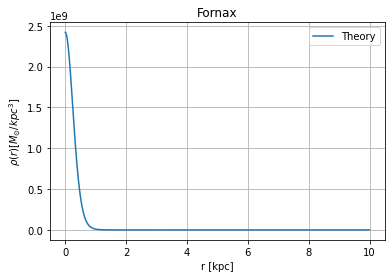

In [71]:
plt.plot(X1v1_f,rho_soliton*rho_minor(X1v1_f,rho_sol=rho_soliton,m_a=m_axion),label='Theory')
plt.ylabel(r'$\rho(r)[M_{\odot}/kpc^{3}]$')
plt.xlabel('r [kpc]')
plt.grid(True)
plt.title('Fornax')
plt.legend(loc='upper right', prop={'size':10})

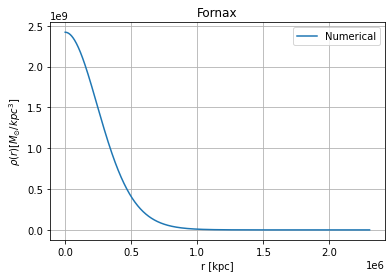

In [72]:
plt.plot(r_units_kpc,phi_0,label='Numerical')
plt.ylabel(r'$\rho(r)[M_{\odot}/kpc^{3}]$')
plt.xlabel('r [kpc]')
plt.grid(True)
plt.title('Fornax')
plt.legend(loc='upper right', prop={'size':10})